###### Import Public & Necessary Library

In [116]:
from datetime import datetime
import numpy as np 
import pandas as pd 
import matplotlib.pylab as plt 
from sklearn.metrics import mean_squared_error
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler
import warnings 
warnings.filterwarnings("ignore")

In [117]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA

In [120]:
path = 'https://raw.githubusercontent.com/ejgao/Time-Series-Datasets/master/monthly-beer-production-in-austr.csv'

df = pd.read_csv(path)
df.head()

,Month,Monthly beer production
0,1956-01,93.2
1,1956-02,96.0
2,1956-03,95.2
3,1956-04,77.1
4,1956-05,70.9


In [121]:
df.describe()

,Monthly beer production
count,476.000000
mean,136.395378
std,33.738725
min,64.800000
25%,112.900000
50%,139.150000
75%,158.825000
max,217.800000


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    476 non-null    object 
 1   Monthly beer production  476 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.6+ KB


In [123]:
df.isnull().sum()

Month                      0
Monthly beer production    0
dtype: int64

###### Convert from string to datetime

In [124]:
df['Month'] = pd.to_datetime(df['Month'],infer_datetime_format=True)
df

,Month,Monthly beer production
0,1956-01-01,93.2
1,1956-02-01,96.0
2,1956-03-01,95.2
3,1956-04-01,77.1
4,1956-05-01,70.9
...,...,...
471,1995-04-01,127.0
472,1995-05-01,151.0
473,1995-06-01,130.0
474,1995-07-01,119.0


###### Set Index Date-Time

In [125]:
index_df = df.set_index(['Month'])
index_df.head()

,Monthly beer production
Month,
1956-01-01,93.2
1956-02-01,96.0
1956-03-01,95.2
1956-04-01,77.1
1956-05-01,70.9


### Check Stationary for Mean: Approximately Solution with Plotting

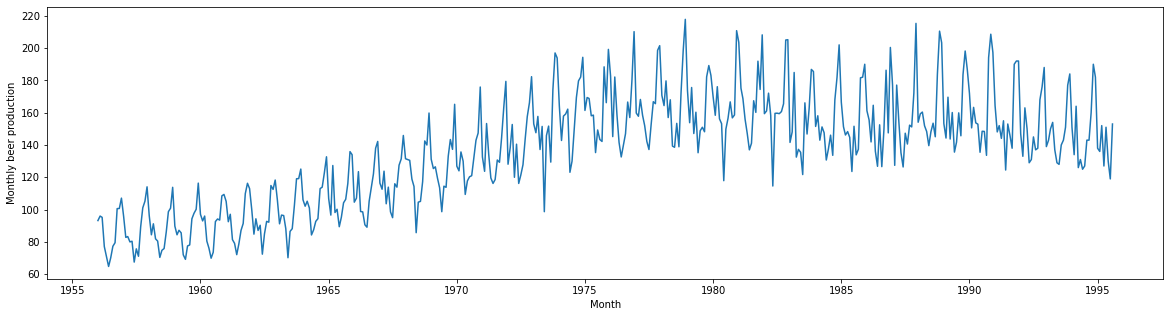

In [126]:
plt.rcParams['figure.figsize']=(20,5)
plt.xlabel('Month')
plt.ylabel('Monthly beer production')
plt.plot(index_df);

Rolling statistics

In [127]:
rolmean = index_df.rolling(window=12).mean() 
rolstd = index_df.rolling(window=12).std()
print(rolmean,rolstd)

            Monthly beer production
Month                              
1956-01-01                      NaN
1956-02-01                      NaN
1956-03-01                      NaN
1956-04-01                      NaN
1956-05-01                      NaN
...                             ...
1995-04-01               146.166667
1995-05-01               147.833333
1995-06-01               148.250000
1995-07-01               147.583333
1995-08-01               148.416667

[476 rows x 1 columns]             Monthly beer production
Month                              
1956-01-01                      NaN
1956-02-01                      NaN
1956-03-01                      NaN
1956-04-01                      NaN
1956-05-01                      NaN
...                             ...
1995-04-01                21.391729
1995-05-01                20.875533
1995-06-01                20.423360
1995-07-01                21.292160
1995-08-01                21.292160

[476 rows x 1 columns]


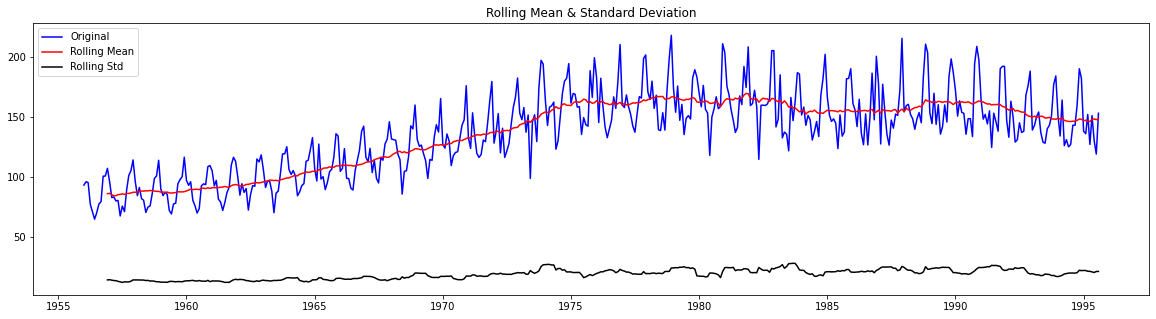

In [128]:
plt.rcParams['figure.figsize']=(20,5)
orig = plt.plot(index_df, color='blue', label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label='Rolling Std')

plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show()



*   Rolling Start at 12th Point in Plot!
*   Rolling mean itself has a trend component even though rolling standard deviation is fairly constant with time



### Check Stationary for Mean: Solution with ACF Plot

In [129]:
import statsmodels.graphics.tsaplots as sgt

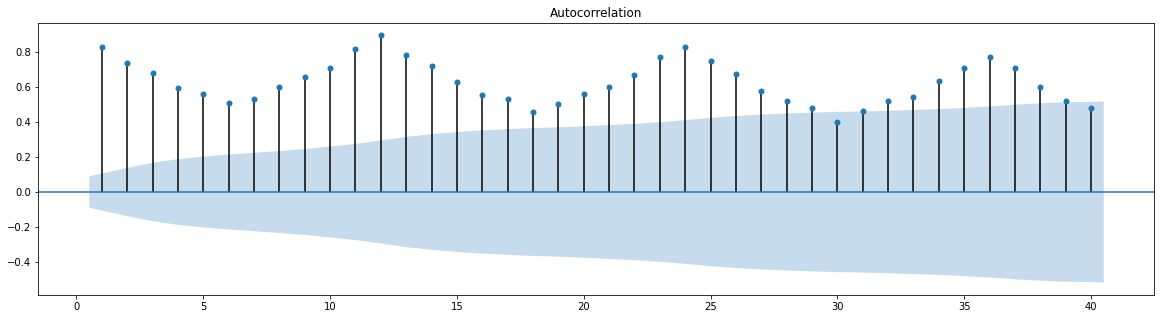

In [130]:
plt.rcParams['figure.figsize']=(20,5)
sgt.plot_acf(index_df,lags=40,zero=False)
plt.show()





*   we see plot hardly goes down as result our Time Series is not stationary.







### Check Stationary for Mean: Exactly Solution with ADCF Test

In [131]:
print('Results of Dickey Fuller Test:')
test = adfuller(index_df['Monthly beer production'])
test 

Results of Dickey Fuller Test:


(-2.282661418787574,
 0.1776209982913261,
 17,
 458,
 {'1%': -3.4447087976702284,
  '10%': -2.5701423432047443,
  '5%': -2.867871300049488},
 3463.9034375936567)



*   For a Time series to be stationary, its ADCF test should have p-value to be low (according to the null hypothesis).
*   p-value is large so our Time Series at the moment is not stationary = H0 Accepted



### Data Transformation to Solve Non-Stationarity in Standard Deviation(Log Scale Transformation)

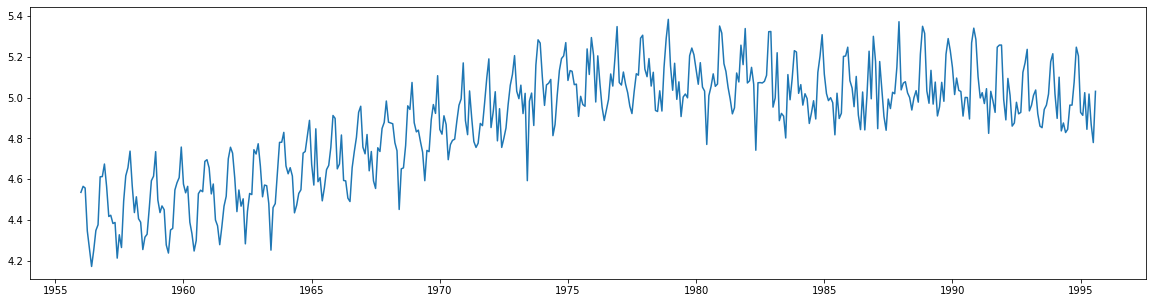

In [132]:
plt.rcParams['figure.figsize']=(20,5)
index_dflog = np.log(index_df)
plt.plot(index_dflog);



*   Clearly you can see low variance into the above curve




### Visualization Mean & Standard Deviation

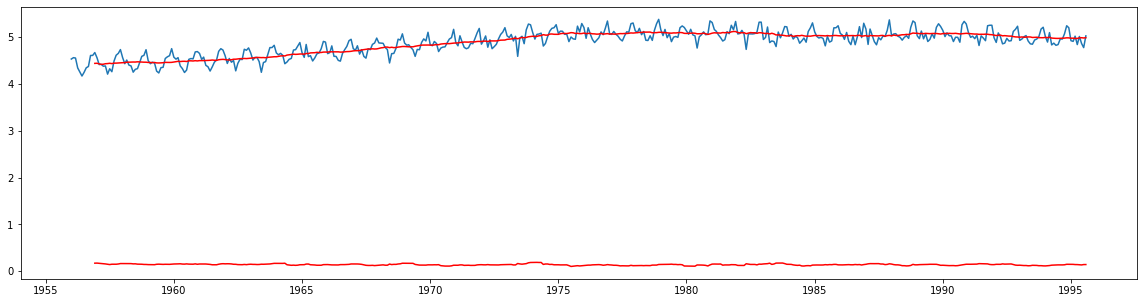

In [133]:
MA = index_dflog.rolling(window=12).mean()
movingSTD = index_dflog.rolling(window=12).std()
plt.rcParams['figure.figsize']=(20,5)
plt.plot(index_dflog)
plt.plot(MA, color='red')
plt.plot(movingSTD, color='red')

From Above Std is stable & stationary but Mean has fluctuation

In [134]:
datasetLogScale_Minus_MovingAverage = index_dflog - MA


datasetLogScale_Minus_MovingAverage.head(12)

#Remove NAN values
datasetLogScale_Minus_MovingAverage.dropna(inplace=True)
datasetLogScale_Minus_MovingAverage.head(10)

,Monthly beer production
Month,
1956-12-01,0.231830
1957-01-01,0.118994
1957-02-01,-0.015558
1957-03-01,0.001590
1957-04-01,-0.041908
1957-05-01,-0.047399
1957-06-01,-0.225688
1957-07-01,-0.117442
1957-08-01,-0.173166


In [135]:
def test_stationarity(timeseries):
    
    #Determine rolling statistics
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()
    
    #Plot rolling statistics
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
    std = plt.plot(movingSTD, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey–Fuller test:
    print('Results of Dickey Fuller Test:')
    dftest = adfuller(timeseries['Monthly beer production'])
    print('p-value Result:', dftest[1])

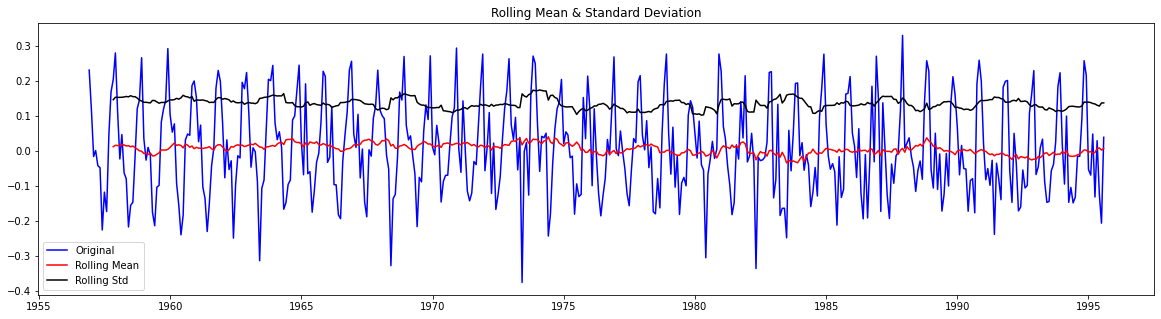

Results of Dickey Fuller Test:
p-value Result: 0.009897753321995975


In [136]:
test_stationarity(datasetLogScale_Minus_MovingAverage)

###### So H0 Rejected and your data is stationary

### Differencing (Time Shift Transformation)

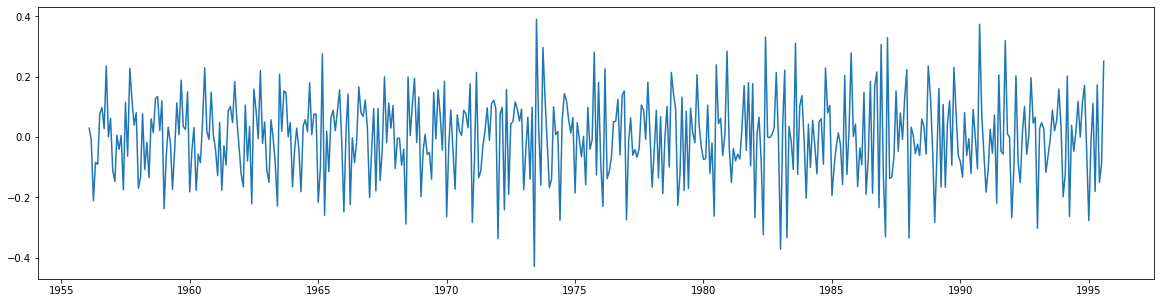

In [137]:
plt.rcParams['figure.figsize']=(20,5)
datasetLogDiffShifting = index_dflog - index_dflog.shift()
plt.plot(datasetLogDiffShifting)



*   Chart Presented fluctuation of Order compared to the previous day




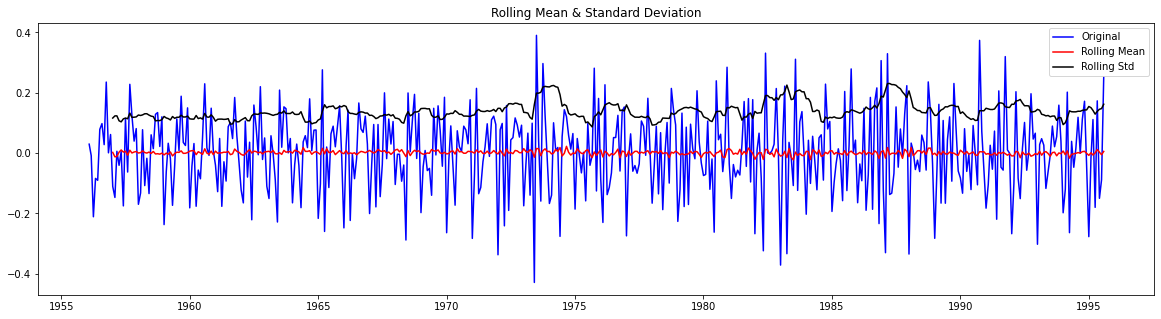

Results of Dickey Fuller Test:
p-value Result: 3.994274317730254e-05


In [138]:
datasetLogDiffShifting.dropna(inplace=True)
test_stationarity(datasetLogDiffShifting)

In [ ]:
3.994274317733542e-05<0.05

True




*   in this way (Differencing from log) we must have reject H0 so data is Stationary.




### ACF

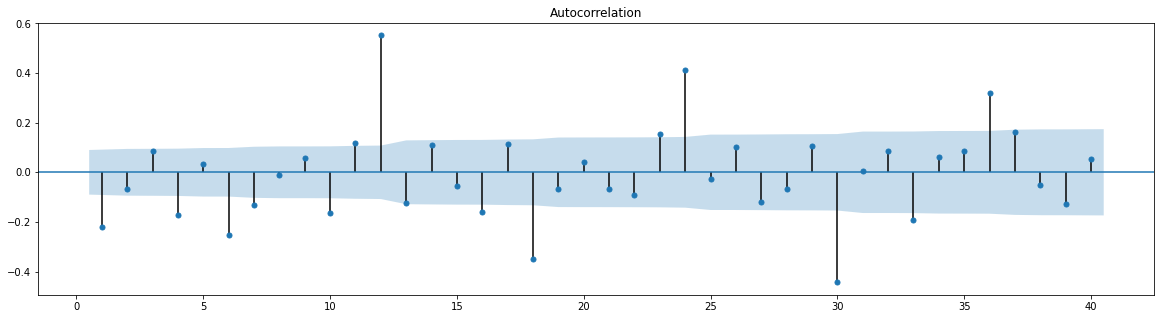

In [139]:
import statsmodels.graphics.tsaplots as sgt
sgt.plot_acf(datasetLogDiffShifting,lags=40,zero=False)
plt.show()

### PACF

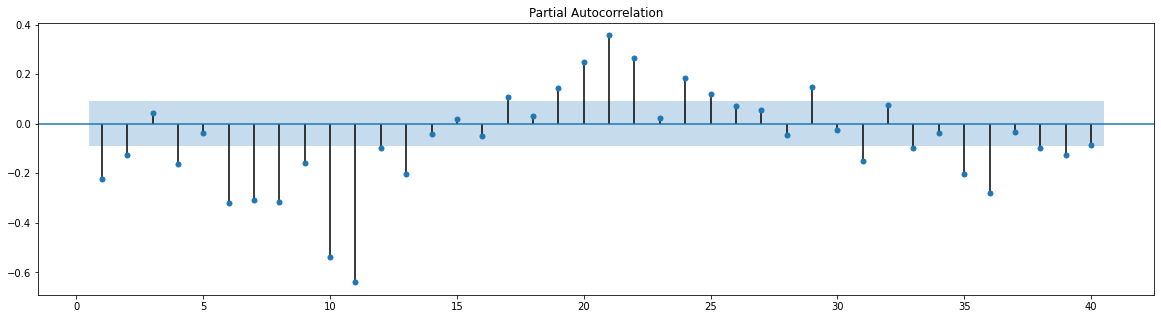

In [140]:
import statsmodels.graphics.tsaplots as sgt
sgt.plot_pacf(datasetLogDiffShifting,lags=40,zero=False)
plt.show()

### Splitting Train and Test data

In [141]:
len(datasetLogDiffShifting["Monthly beer production"])*0.8

380.0

In [ ]:
length_train = 380
train = datasetLogDiffShifting.iloc[:length_train,:]
train.tail()

,Monthly beer production
Month,
1987-05-01,-0.132791
1987-06-01,-0.067304
1987-07-01,0.153020
1987-08-01,-0.046552
1987-09-01,0.079933


In [142]:
test=datasetLogDiffShifting.iloc[length_train:,: ]
test.head()

,Monthly beer production
Month,
1987-10-01,-0.007249
1987-11-01,0.130053
1987-12-01,0.223376
1988-01-01,-0.334431
1988-02-01,0.033187


### ARIMA Model

### Hyperparameter Tuning

In [143]:
import itertools
from statsmodels.tsa.arima_model import ARIMA
p = q = d = range(0,5)
pdq = list(itertools.product(p,d,q))

In [144]:
import warnings 
warnings.filterwarnings("ignore")

for param in pdq:
        try:
            model=ARIMA(train.values,order=param)
            results=model.fit()
            print('ARIMA{}-Log Likelihood:{}-AIC:{}'.format(param,results.llf,results.aic))
        except:
            continue
            

Plotting ARIMA model


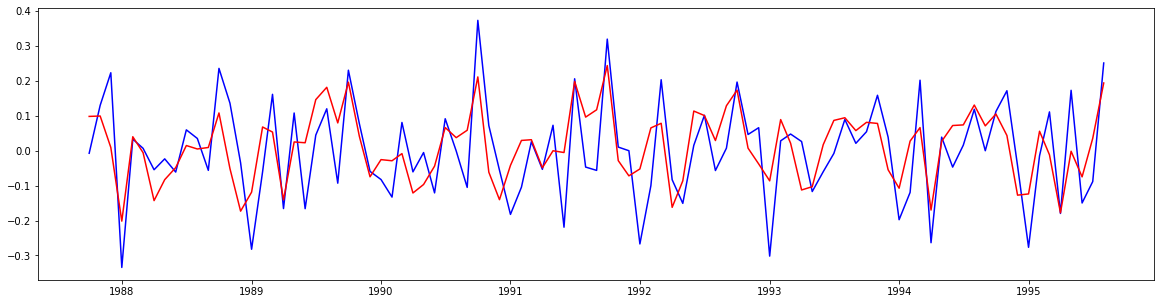

In [145]:
model = ARIMA(datasetLogDiffShifting, order=(4,0,2))
results_ARIMA = model.fit(disp=0)

plt.rcParams['figure.figsize']=(20,5)
#plt.plot(train['Monthly beer production'], color='green')
plt.plot(test['Monthly beer production'], color='blue')
plt.plot(results_ARIMA.fittedvalues[380:], color='red')
print('Plotting ARIMA model')

In [146]:
error_ARIMA = mean_squared_error(test , results_ARIMA.fittedvalues[380:,])**0.5
print('Test RMSE: %.3f' % error_ARIMA)

Test RMSE: 0.104


In [147]:
ARIMA_MODEL=pd.DataFrame({'ARIMA':results_ARIMA.fittedvalues[380:]})


In [148]:
RollBack0  =pd.concat([test,ARIMA_MODEL], axis=1)
RollBack0

,Monthly beer production,ARIMA
Month,,
1987-10-01,-0.007249,0.098314
1987-11-01,0.130053,0.099424
1987-12-01,0.223376,0.009373
1988-01-01,-0.334431,-0.201740
1988-02-01,0.033187,0.040088
...,...,...
1995-04-01,-0.179693,-0.177789
1995-05-01,0.173093,-0.001535
1995-06-01,-0.149745,-0.074863


In [149]:
RollBack0['ARIMA_convert_shift']=index_dflog['Monthly beer production'][380:]-RollBack0['ARIMA']
RollBack0

,Monthly beer production,ARIMA,ARIMA_convert_shift
Month,,,
1987-10-01,-0.007249,0.098314,4.920289
1987-11-01,0.130053,0.099424,5.049232
1987-12-01,0.223376,0.009373,5.362659
1988-01-01,-0.334431,-0.201740,5.239342
1988-02-01,0.033187,0.040088,5.030701
...,...,...,...
1995-04-01,-0.179693,-0.177789,5.021976
1995-05-01,0.173093,-0.001535,5.018815
1995-06-01,-0.149745,-0.074863,4.942397


In [150]:
RollBack00=RollBack0.reset_index()
RollBack00

,Month,Monthly beer production,ARIMA,ARIMA_convert_shift
0,1987-10-01,-0.007249,0.098314,4.920289
1,1987-11-01,0.130053,0.099424,5.049232
2,1987-12-01,0.223376,0.009373,5.362659
3,1988-01-01,-0.334431,-0.201740,5.239342
4,1988-02-01,0.033187,0.040088,5.030701
...,...,...,...,...
90,1995-04-01,-0.179693,-0.177789,5.021976
91,1995-05-01,0.173093,-0.001535,5.018815
92,1995-06-01,-0.149745,-0.074863,4.942397
93,1995-07-01,-0.088411,0.035449,4.743674


In [151]:
error_ARIMA_convert = mean_squared_error(RollBack0['ARIMA_convert_shift'] , index_dflog['Monthly beer production'].shift(periods=1,fill_value=0)[381:])**0.5
print('Test RMSE: %.3f' % error_ARIMA1)

Test RMSE: 0.104


### Checking your Res of Model

In [152]:
res =results_ARIMA.resid

In [153]:
res=pd.DataFrame(res)
res.describe()

,0
count,475.000000
mean,-0.000400
std,0.095933
min,-0.327763
25%,-0.065023
50%,0.005581
75%,0.069526
max,0.217848


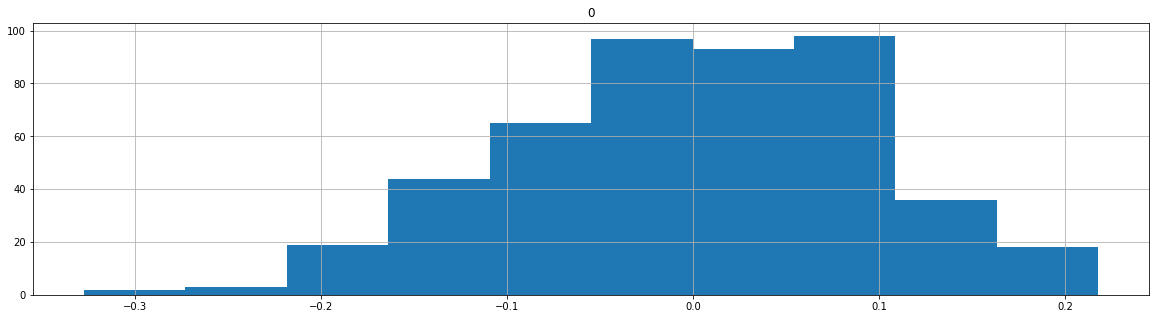

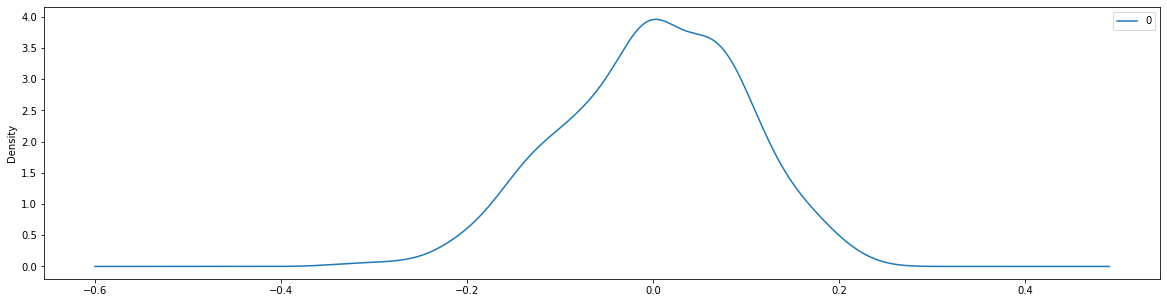

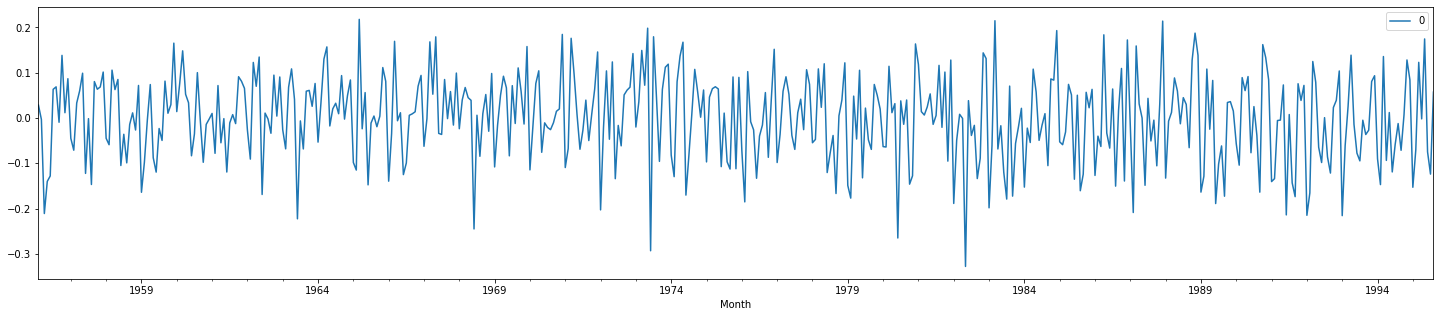

In [154]:
res.hist()
res.plot(kind='kde',figsize=(20,5))
res.plot(figsize=(25,5))
plt.show()

###### your mean is around zero and that is right for analyst! cause your Res must around Normal Distribution!

### LSTM Model

In [155]:
import tensorflow as tf
from keras.layers import Dense,Dropout,SimpleRNN,LSTM
from keras.models import Sequential
from sklearn.metrics import r2_score

In [156]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    dff = pd.DataFrame(data)
    cols, names = list(), list()
    
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(dff.shift(-i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
        
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(dff.shift(-i))
        if i==0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1)) for j in range(n_vars)]
        
        agg = pd.concat(cols, axis=1)
        agg.columns = names
        if dropnan:
            agg.dropna(inplace=True)
        return agg

Normalize data

In [157]:
values = index_dflog.values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

# We decide that Forecasting provide by one previous TimeStep:
reframed = series_to_supervised(scaled, 12, 1)

### change Data to 3D Dimension

In [158]:
values = reframed.values

#The logic is to have 365 days worth of training data. this could also be a hyperparameter that can be tuned.
n_train_time = 380

# split into input and outputs
train = values[:n_train_time, :]
test = values[n_train_time:, :]

train_x, train_y = train[:, :-1], train[:, -1]
test_x, test_y = test[:, :-1], test[:, -1]

# reshape input to be 3D [samples, timesteps, features]
train_x = train_x.reshape((train_x.shape[0], 1, train_x.shape[1]))
test_x = test_x.reshape((test_x.shape[0], 1, test_x.shape[1]))

In [159]:
print(train_x.shape, test_x.shape )

(380, 1, 12) (84, 1, 12)


In [160]:
print(train_y.shape, test_y.shape )

(380,) (84,)


Epoch 1/20
6/6 - 3s - loss: 0.2204 - val_loss: 0.2167 - 3s/epoch - 470ms/step
Epoch 2/20
6/6 - 0s - loss: 0.0942 - val_loss: 0.0762 - 53ms/epoch - 9ms/step
Epoch 3/20
6/6 - 0s - loss: 0.0290 - val_loss: 0.0169 - 49ms/epoch - 8ms/step
Epoch 4/20
6/6 - 0s - loss: 0.0157 - val_loss: 0.0140 - 48ms/epoch - 8ms/step
Epoch 5/20
6/6 - 0s - loss: 0.0236 - val_loss: 0.0184 - 57ms/epoch - 9ms/step
Epoch 6/20
6/6 - 0s - loss: 0.0212 - val_loss: 0.0133 - 57ms/epoch - 10ms/step
Epoch 7/20
6/6 - 0s - loss: 0.0168 - val_loss: 0.0111 - 59ms/epoch - 10ms/step
Epoch 8/20
6/6 - 0s - loss: 0.0155 - val_loss: 0.0134 - 58ms/epoch - 10ms/step
Epoch 9/20
6/6 - 0s - loss: 0.0152 - val_loss: 0.0141 - 54ms/epoch - 9ms/step
Epoch 10/20
6/6 - 0s - loss: 0.0152 - val_loss: 0.0125 - 51ms/epoch - 8ms/step
Epoch 11/20
6/6 - 0s - loss: 0.0140 - val_loss: 0.0110 - 57ms/epoch - 9ms/step
Epoch 12/20
6/6 - 0s - loss: 0.0140 - val_loss: 0.0105 - 50ms/epoch - 8ms/step
Epoch 13/20
6/6 - 0s - loss: 0.0128 - val_loss: 0.0103 - 5

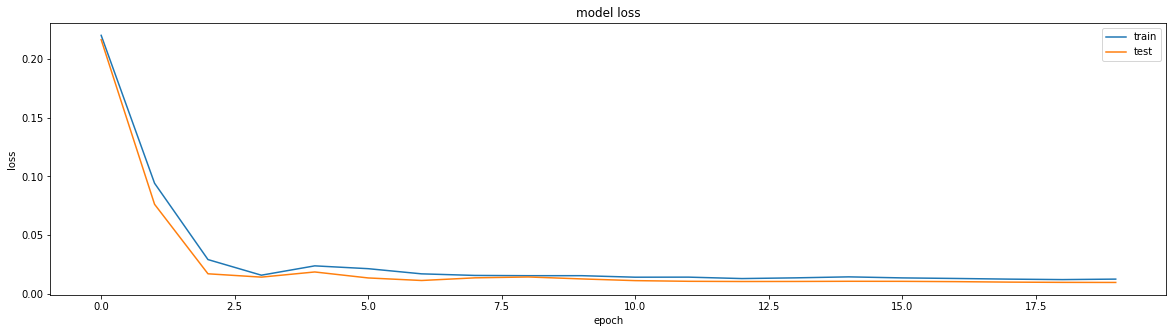

Test RMSE: 0.118


In [161]:
model = Sequential()
model.add(LSTM(100, input_shape=(train_x.shape[1], train_x.shape[2])))
model.add(Dropout(0.2))
# model.add(LSTM(70))
# model.add(Dropout(0.3))

# Dropout means that after every epoch, drop some connetion with data, its suitable for avoiding overfitting
# Hyperparameters: Dropout rate, Units

# output layer
model.add(Dense(1))

#compile model
model.compile(loss='mean_squared_error', optimizer='adam')

# fit model
history = model.fit(train_x, train_y, epochs=20, batch_size=70, validation_data=(test_x, test_y), verbose=2, shuffle=False)
# in each 70 data, you have 1 update weights
# using Validation Data to Avoide Overfitting

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

# make a prediction
yhat = model.predict(test_x)
test_x = test_x.reshape((test_x.shape[0], 12))
# invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_x[:, -6:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]

# inverse scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_x[:, -6:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

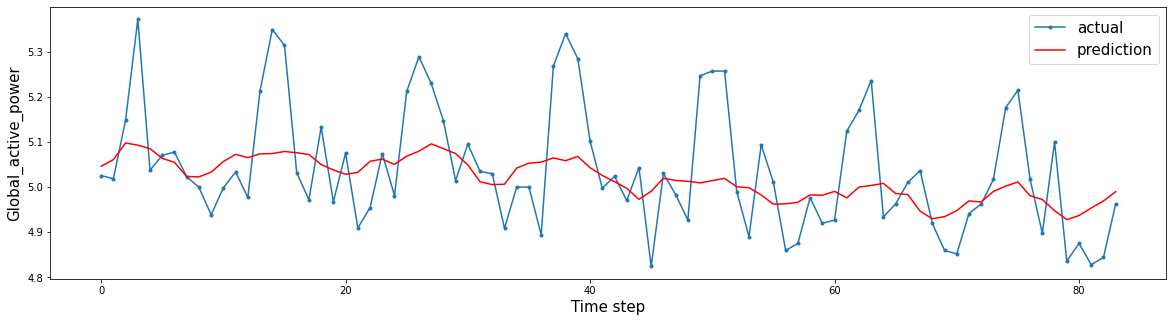

In [162]:
plt.rcParams['figure.figsize']=(20,5)
aa=[x for x in range(84)]
plt.plot(aa, inv_y[:84], marker='.', label="actual")
plt.plot(aa, inv_yhat[:84], 'r', label="prediction")
plt.ylabel('Global_active_power', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show()

In [163]:
RollBack1 = pd.concat([pd.DataFrame({'TEST':inv_y}), pd.DataFrame({'LSTM':inv_yhat})], axis=1)
RollBack1

,TEST,LSTM
0,5.025852,5.046460
1,5.018603,5.061021
2,5.148657,5.098054
3,5.372032,5.093148
4,5.037602,5.085431
...,...,...
79,4.836282,4.928122
80,4.875197,4.937154
81,4.828314,4.953991
82,4.844187,4.969332


## Prophet Model

In [164]:
import fbprophet
print('Prophet %s' % fbprophet.__version__)

Prophet 0.7.1


In [165]:
print(df.shape)
print(df.head())

(476, 2)
       Month  Monthly beer production
0 1956-01-01                     93.2
1 1956-02-01                     96.0
2 1956-03-01                     95.2
3 1956-04-01                     77.1
4 1956-05-01                     70.9


In [166]:
df.columns = ['ds', 'y']
df['ds']= pd.to_datetime(df['ds'])
df.head()

,ds,y
0,1956-01-01,93.2
1,1956-02-01,96.0
2,1956-03-01,95.2
3,1956-04-01,77.1
4,1956-05-01,70.9


In [167]:
df['y']=np.log(df['y'])
df

,ds,y
0,1956-01-01,4.534748
1,1956-02-01,4.564348
2,1956-03-01,4.555980
3,1956-04-01,4.345103
4,1956-05-01,4.261270
...,...,...
471,1995-04-01,4.844187
472,1995-05-01,5.017280
473,1995-06-01,4.867534
474,1995-07-01,4.779123


In [168]:
from fbprophet import Prophet

model = Prophet()
model.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


###Make In-Sample Forecast

In [169]:
length_train = 380
train = df.iloc[:length_train,:]
test=df.iloc[length_train:,: ]

In [170]:
forecast = model.predict(test)
print(forecast[['ds','yhat', 'yhat_lower', 'yhat_upper']].head())

          ds      yhat  yhat_lower  yhat_upper
0 1987-09-01  5.010458    4.924702    5.094349
1 1987-10-01  5.168219    5.085504    5.254203
2 1987-11-01  5.211850    5.124594    5.299662
3 1987-12-01  5.284550    5.205687    5.366423
4 1988-01-01  5.081543    4.999485    5.167944


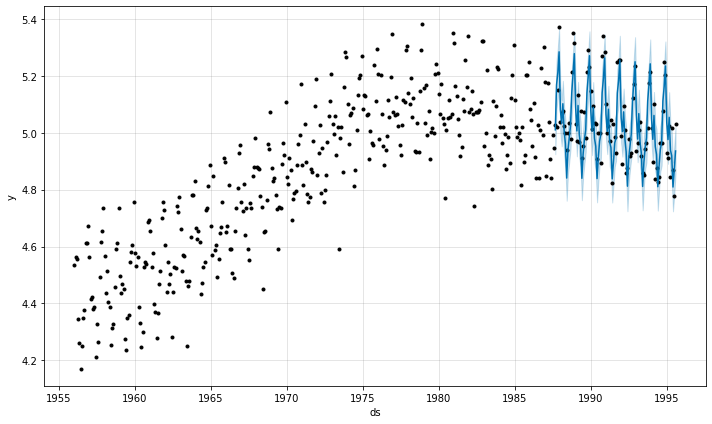

In [171]:
model.plot(forecast)
plt.show()

In [172]:
error_PROPHET = mean_squared_error(test['y'], forecast['yhat']) **0.5
print('Test RMSE: %.3f' % error_PROPHET)

Test RMSE: 0.067


In [173]:
RollBack = pd.concat([RollBack1,pd.DataFrame({'Prophet':forecast['yhat'][:84]})],axis=1)
RollBack

,TEST,LSTM,Prophet
0,5.025852,5.046460,5.010458
1,5.018603,5.061021,5.168219
2,5.148657,5.098054,5.211850
3,5.372032,5.093148,5.284550
4,5.037602,5.085431,5.081543
...,...,...,...
79,4.836282,4.928122,4.951707
80,4.875197,4.937154,4.923845
81,4.828314,4.953991,4.810393
82,4.844187,4.969332,4.882575


## Conclusiones

In [174]:
RollBack = pd.concat([RollBack,RollBack00['ARIMA_convert_shift'][:84]],axis=1)
RollBack


,TEST,LSTM,Prophet,ARIMA_convert_shift
0,5.025852,5.046460,5.010458,4.920289
1,5.018603,5.061021,5.168219,5.049232
2,5.148657,5.098054,5.211850,5.362659
3,5.372032,5.093148,5.284550,5.239342
4,5.037602,5.085431,5.081543,5.030701
...,...,...,...,...
79,4.836282,4.928122,4.951707,4.848360
80,4.875197,4.937154,4.923845,4.756116
81,4.828314,4.953991,4.810393,4.770205
82,4.844187,4.969332,4.882575,4.831912


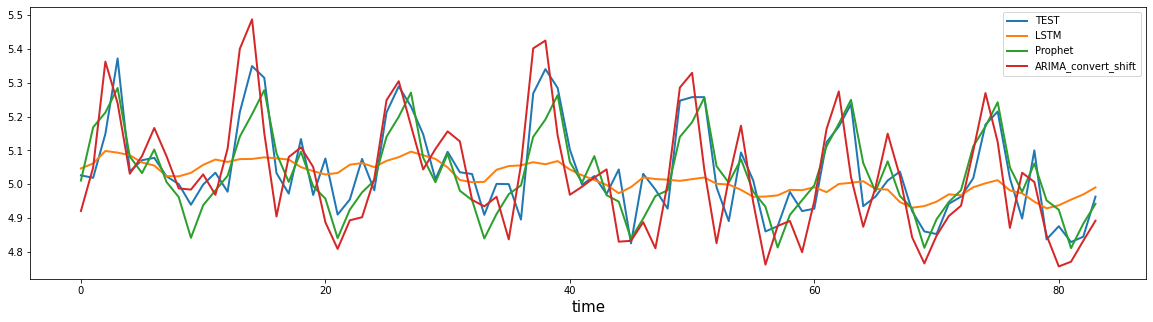

In [175]:
RollBack.plot(figsize=(20,5), linewidth=2, fontsize=10)
plt.xlabel('time', fontsize=15);

In [176]:
Error = pd.DataFrame({"Models":["ARIMA",  "Prophet", "LSTM"],
                      "RMSE Log" : [error_ARIMA_convert,  error_PROPHET, rmse]})
Error

,Models,RMSE Log
0,ARIMA,0.104144
1,Prophet,0.067435
2,LSTM,0.118004


In [177]:
print('Test RMSE ARIMA: %.3f' % mean_squared_error(np.exp(RollBack.TEST), np.exp(RollBack.ARIMA_convert_shift)))
print('Test RMSE Prophet: %.3f' % mean_squared_error(np.exp(RollBack.TEST), np.exp(RollBack.Prophet)))
print('Test RMSE LSTM: %.3f' % mean_squared_error(np.exp(RollBack.TEST), np.exp(RollBack.LSTM)))


Test RMSE ARIMA: 283.249
Test RMSE Prophet: 113.783
Test RMSE LSTM: 387.763
